In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from figure1 import plot_figure_1
from models import BetaBernoulli, SumOfBetaEce
from data_utils import datafile_dict, num_classes_dict, prepare_data

In [2]:
# datafile = datafile_dict['cifar100']
# num_classes = 100
dataset = 'cifar100'
num_samples = 1000

datafile = datafile_dict[dataset]
num_classes = num_classes_dict[dataset]

categories, observations, confidences, idx2category, category2idx, labels = prepare_data(datafile, False)

class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle',
    'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch',
    'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
    'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
    'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
    'willow_tree', 'wolf', 'woman', 'worm']

In [3]:
# accuracy models
accuracy_model = BetaBernoulli(k=num_classes, prior=None)
accuracy_model.update_batch(categories, observations)

# ece models for each class
ece_models = [SumOfBetaEce(num_bins=10, weight=None, prior_alpha=None, prior_beta=None) for i in range(num_classes)]
for class_idx in range(num_classes):
    mask_idx = [i for i in range(len(observations)) if categories[i] == class_idx]
    observations_sublist = [observations[i] for i in mask_idx]
    confidences_sublist = [confidences[i] for i in mask_idx]
    ece_models[class_idx].update_batch(confidences_sublist, observations_sublist)

In [4]:
# draw samples from posterior of classwise accuracy
accuracy_samples = accuracy_model.sample(num_samples) # (num_categories, num_samples)
ece_samples = np.array([ece_models[class_idx].sample(num_samples) 
                        for class_idx in range(num_classes)]).squeeze() # (num_categories, num_samples)

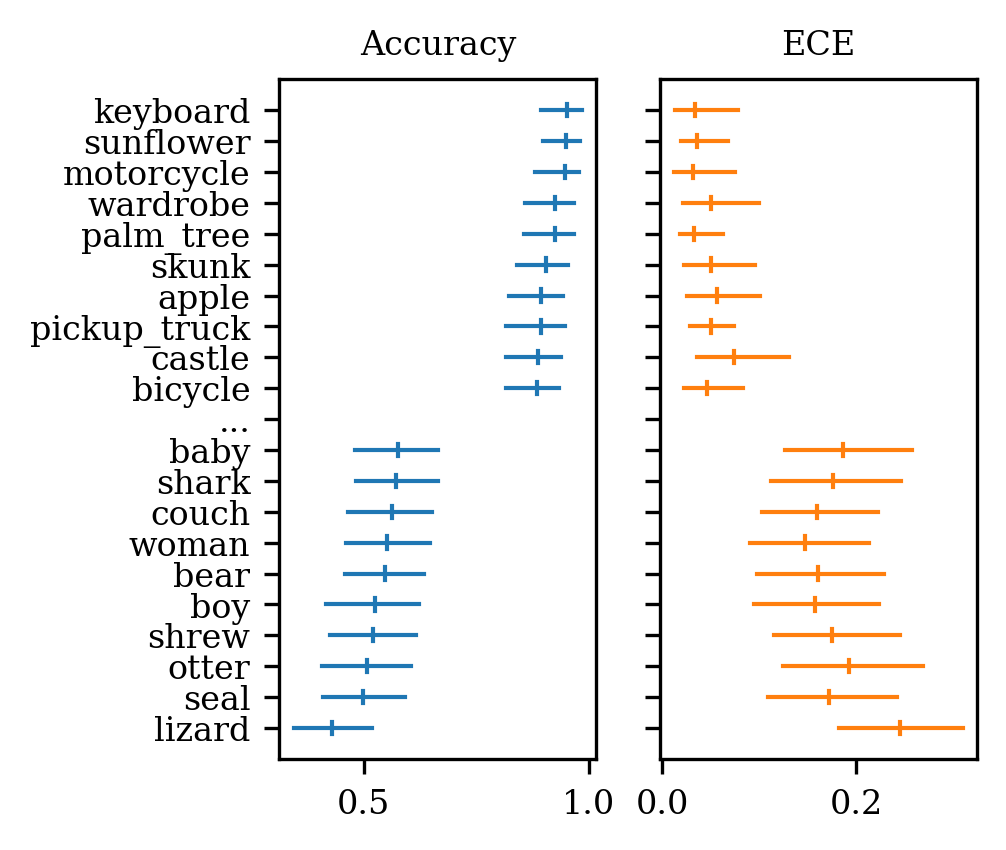

In [5]:
accuracy = np.array([np.quantile(accuracy_samples, 0.025, axis=1),
                         np.quantile(accuracy_samples, 0.5, axis=1),
                         np.quantile(accuracy_samples, 0.975, axis=1)]).T
ece = np.array([np.quantile(ece_samples, 0.025, axis=1),
                         np.quantile(ece_samples, 0.5, axis=1),
                         np.quantile(ece_samples, 0.975, axis=1)]).T
fig, axes = plot_figure_1(accuracy, ece, labels=class_names, limit = 10, reverse=False)

In [6]:
fig.tight_layout()
fig.savefig('../figures/figure1.pdf', bbox_inches="tight")